<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment220930_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import package
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
np.random.seed(42)

# **CHAPTER 9 비지도 학습**
___
- 오늘날 대부분의 머신러닝 애플리케이션이 지도 학습 기반이지만, 사용할 수 있는 데이터는 대부분 레이블이 없다. 즉, 입력 피처 X는 있지만 레이블 y가 없다.
- 9장에서는 몇 가지 비지도 학습과 알고리즘을 알아볼 예정이다.
  + 군집(clustering)
  + 이상치 탐지(outlier detection)
  + 밀도 추정(density estimation)

## **9.1 군집**
___
- **군집(clusterting)** : 비슷한 샘플을 구별해 하나의 **클러스터(cluster)** 또는 비슷한 샘플의 그룹으로 할당하는 작업
- 분류와 마찬가지로 각 샘플은 하나의 그룹에 할당된다.
- 군집은 다음과 같은 다양한 분야에 사용된다.
  - **고객 분류** : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있다. 이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는 데 도움이 된다. 이를 기반으로 제품 추천이나 마케팅 전략을 세울 수 있다.
  - **데이터 분석** : 새로운 데이터셋을 분석할 때, 군집 알고리즘을 실행하고, 각 클러스터를 따로 분석하면 도움이 된다.
  - **차원 축소 기법** : 한 데이터셋에 군집 알고리즘을 적용하면, 각 클러스터에 대해 샘플이 얼마나 잘 맞는지(샘플의 친화성)을 측정할 수 있다. 각 샘플의 피처 벡터를 클러스터 친화성의 벡터로 바꿀 수 있다. 이 벡터는 일반적으로 원본 피처 벡터보다 차원이 적지만, 분석을 위한 충분한 정보를 가지고 있다.
  - **이상치 탐지** : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다.
  - **준지도 학습** : 레이블이된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가에 성능을 크게 향상한다.
  - **검색 엔진** : 일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아준다. 이러한 시스템을 구축하려면 먼저 데이터 베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 한다. 사용자가 찾으려는 이미지를 제공하면, 훈련된 군집 모델을 이용해 이미지의 클러스터를 찾고, 이 클러스터의 모든 이미지를 반환한다.
  - **이미지 분할** : 색을 기반으로 픽셀을 클러스터로 모은다. 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이는 이미지에 있는 색상의 종류를 크게 줄인다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 사용한다.
- 클러스터에 대한 보편적인 정의는 없다. 알고리즘마다 다른 종류의 클러스터를 감지한다. 어떤 알고리즘은 **센트로이드(centroid)**라 부르는 특정 포인트를 중심으로 모인 샘플을 찾는다. 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾기도 한다.

### | **9.1.1 k-평균**
- 아래 그림과 같이 레이블이 없는 데이터셋을 생각해보자.
- 샘플 덩어리 다섯 개가 잘 보인다.
- **K-평균**(혹은 로이드-포지 알고리즘)은 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘이다.

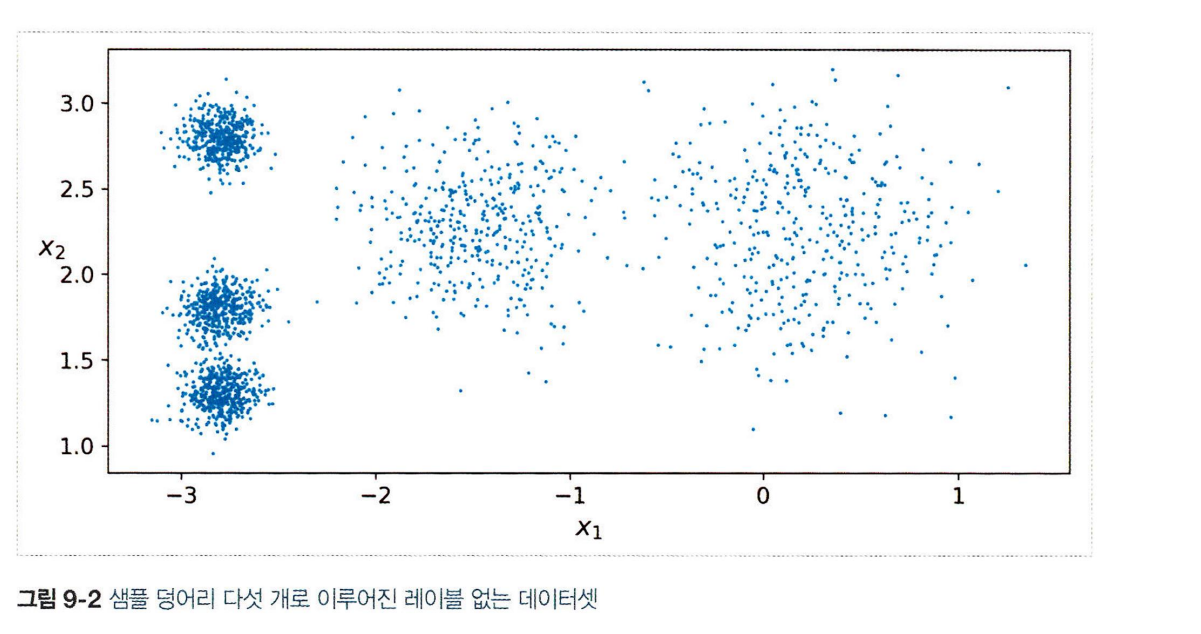

In [4]:
# 예제 데이터셋 생성
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

- 위의 데이터셋에 k-평균을 알고리즘을 훈련해보자. 이 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당한다.

In [ ]:
# k-평균 알고리즘 훈련
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

- 알고리즘이 찾을 클러스터 개수 k를 지정해야 하는데, 이 예제에서는 데이터를 보고 k를 5로 지정했지만, 이는 일반적으로 쉬운 일이 아니다.
- 각 샘플은 다섯 개의 클러스터 중 하나에 할당된다. 군집에서 각 샘플의 레이블(label)은 알고리즘이 샘플에 할당한 클러스터의 인덱스로 분류의 클래스 레이블과는 다른 개념이다.
- `KMeans` 클래스 객체는 `labels_` 속성에 훈련된 샘플의 레이블을 가지고 있다.

In [ ]:
# 예측 결과
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
# 훈련된 샘플의 레이블
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

- 이 알고리즘이 찾은 센트로이드 다섯 개도 다음과 같이 확인할 수 있다.

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

- 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다.

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) # 새로운 샘플
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

- 클러스터의 결정 경계를 그려보면, 보로노이 다이어그램(평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림)을 얻을 수 있다.
- 샘플은 대부분 적절한 클러스터에 잘 할당되었으나, 몇 개는 레이블이 잘못 부여되었다.
- k-평균 알고리즘은 클러스터의 크기가 실제와 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문이다.
- **하드 군집(hard clustering)**이라는 샘플을 하나의 클러스터에 할당하는 것보다, 클러스타마다 샘플에 점수를 부여하는 **소프트 군집(soft clustering)**이 더 유용할 수 있다.
- 이 점수는 샘플과 센트로이드 사이의 거리나 가우시안 방사기저 함수와 같은 유사도 점수가 될 수 있다.
- `KMeans` 클래스의 `transform()` 메서드는 샘플과 각 센트로이드 사이의 거리를 반환한다.

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

- 고차원 데이터셋을 이러한 방식으로 변환하면 k-차원 데이터셋이 만들어지는데, 이는 매우 효율적인 비선형 차원 축소 기법이 될 수 있다.

#### **k-평균 알고리즘**
___
- k-평균 알고리즘의 작동원리에 대해 알아보자. 
  1. 우선 센트로이드가 주어진다면 데이터셋에 있는 모든 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있다.
  2. 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플의 평균을 계산하여, 모든 센트로이드를 쉽게 구할 수 있다.
  3. 하지만 레이블이나 센트로이드가 주어지지 않는다면 어떻게 해야 할까?
    + 처음에는 센트로이드를 랜덤하게 선정한다.(예 : 무작위로 k 개의 샘플을 뽑아 그 위치를 센트로이드로 정한다.)
    + 그다음 샘플에 레이블을 할당하고, 센트로이드를 업데이트한다.
    + 위의 작업을 센트로이드에 변화가 없을 때까지 계속한다.
    + 이 알고리즘은 제한된 횟수 안에 수렴하는 것을 보장한다.
- 3번째 알고리즘은 수렴하는 것이 보장되지만, 적절한 솔루션으로 수렴하지 못할 수 있다. 이는 센트로이드 초기값에 의해 결정된다.

#### **센트로이드 초기화 방법**
___
- 센트로이드 위치를 근사하게 알 수 있다면, `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, `n_init`을 1로 설정한다.

In [ ]:
# 센트로이드 위치를 근사하게 알 경우
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]) # 넘파이 배열
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1, random_state=42) # n_init을 1로 설정
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

- 또 다른 방법은 랜덤 초기화를 다르게 하여, 여러 번 알고리즘을 실행하고, 가장 좋은 솔루션을 선택하는 것이다.
  + 랜덤 초기화 횟수는 `n_init` 매개변수로 조절한다. 기본값은 10이다.
  + 사이킷런은 이 중 최선의 솔루션을 반환하는데, 최선의 솔루션을 어떻게 알 수 있을까? **이너셔(inertia)**라는 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리를 성능 지표로 사용한다.
  + `KMeans` 클래스는 알고리즘을 `n_init` 번 실행하여 이니셔가 가장 낮은 모델을 반환한다.


In [ ]:
kmeans.inertia_

211.5985372581684

- `score()` 메서드는 이너셔의 음수값을 반환한다. 음수값인 이유는 사이킷런의 '큰 값이 좋은 것이다'라는 규칙을 따라야 하기 때문이다.

In [ ]:
kmeans.score(X)

-211.59853725816836

- 이후 k-평균 알고리즘을 향상시킨 **k-평균++ 알고리즘**이 제안되었다. 
  1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$을 선택한다.
  2. 아래 식의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드 $c^{(i)}$로 선택한다.
  $$D(x^{(i)})^2/\sum_{j=1}^mD(x^{(j)})^2$$
    + 여기서 $D(x^{(i)})$는 샘플 $x^{(i)}$와 이미 선택된 가장 가까운 센트로이드까지 거리이다.
    + 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높인다.
  3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복한다.
- `KMeans` 클래스는 기본적으로 이 초기화 방법을 사용한다. k개의 샘플을 랜덤하게 선택하여 초기 센트로이드로 지정하고 싶다면 `init` 매개변수를 `"random|"`으로 지정하면 된다.

#### **k-평균 속도 개선과 미니배치 k-평균**
___
- 불필요한 거리 계산을 피하여, 알고리즘의 속도를 상당히 높일 수 있다.
  - 이를 위해 삼각 부등식(triangle inequality)이 사용되었다.
  - 그리고 샘플과 센트로이드 사이의 거리에 하한선과 상한선을 둔다.
  - 이 알고리즘은 `KMeans` 클래스에서 기본으로 사용한다.
- **미니배치 k-평균** : 전체 데이터셋을 사용해 반복하지 않고, 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동한다.
  + 아는 알고리즘의 속도를 3~4배 향상시킨다.
  + 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있다.
  + 사이킷런의 `MiniBatchKMeans` 클래스로 이 알고리즘을 구현할 수 있다.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

- 데이터셋이 메모리에 들어가지 않으면 `memmap` 클래스를 사용하거나, `MiniBatchKMeans` 클래스의 `partial_fit()` 메서드에 한 번에 하나의 미니 배치를 전달할 수 있다.
- 미니배치 k-평균 알고리즘은 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다. 특히 클러스터의 개수가 증가할수록 그렇다.

#### **최적의 클러스터 개수 찾기**
___
- 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아니다. 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 되기 때문이다.
- 최선의 클러스터 개수를 선택하는 정확하지만 게산 비용이 많이 드는 방법은 **실루엣 점수(silhouette score)**이다. 이 값은 모든 샘플에 대한 **실루엣 계수(silhouette coefficient)**의 평균이다.
  + 샘플의 실루엣 계수는 다음과 같이 계산한다. 
  $$ \frac{b-a}{max(a,b)}$$
    - $a$ : 동일한 클러스터에 있는 다른 샘플까지의 평균 거리(즉, 클러스터 내부의 평균 거리)
    - $b$ : 자신이 속한 클러스터를 제외한 가장 가까운 클러스터까지 평균 거리
  + 실루엣 계수는 -1에서 +1까지 바뀔 수 있다.
  + 실루엣 계수가 +1에 가까우면, 자신의 클러스터 안에 잘 속해 있고, 다른 클러스터와는 멀리 떨어져 있다는 뜻이다. 실루엣 계수가 0에 가까우면 클러스터 경게에 위치한다는 의미이고, -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미이다.
- 실루엣 점수를 계산하려면 사이킷런의 `silhouette_score()` 함수를 사용한다.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_) # 모든 샘플과 할당된 레이블 전달

0.655517642572828

- 모든 샘플의 실루엇 계수를 할당된 클러스터와 계수값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있는데, 이를 **실루엣 다이어그램**이라고 한다.

### | **9.1.2 k-평균의 한계**
- k-평균은 속도가 빠르고 확장이 용이하다는 장점이 있지만, 완벽한 것은 아니다. 최적이 아닌 솔루션을 피하기 위해 알고리즘을 여러 번 실행해야 하며, 클러스터 개수를 지정해야 한다. 또한 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.
- 타원형 클러스터에는 가우시안 혼합 모델이 잘 작동한다.
- 이제 군집을 활용할 수 있는 여러가지 사례들에 대해 살펴보자.

### | **9.1.3 군집을 사용한 이미지 분할**
- **이미지 분할(image segmentation)**은 이미지를 세그먼트 여러 개로 분할하는 작업니다.
- **시맨틱 분할(semantic segmentation)**에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당된다.
- 시맨틱 또는 인스턴스 분할에서 최고 수준의 성능을 내려면 CNN을 사용한 복잡한 모델을 사용해야 하기 때문에, 여기서는 훨씬 쉽고 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당하는 **색상 분할(color segmentation)**을 수행해보자.

In [ ]:
# 무당벌레 이미지를 다운로드
import urllib.request

PROJECT_ROOT_DIR = "."

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"

print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f469380df10>)

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

- 먼저 matplotlib의 `imread()` 함수를 사용해 이미지를 읽어보았다.
  + 이 이미지는 높이, 너비, 컬러 채널 개수의 3D 배열로 표현된다.
  + 컬러 채널에는 빨강, 초록, 파랑 채널이 있으며, 0.0과 1.0 사이의 값을 가지고 있다.
- 이 배열을 RGB 색상의 긴 리스트로 변환한 다음 k-평균을 사용해 이 색상을 클러스터로 모아보자.

In [ ]:
X = image.reshape(-1, 3) # 긴 리스트로 변환

kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

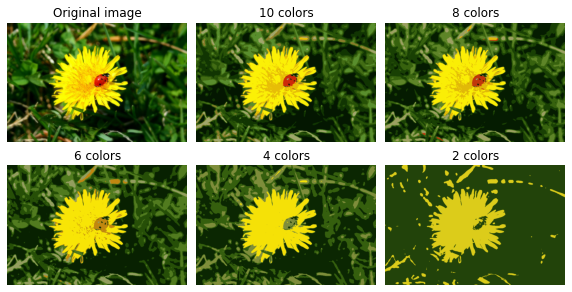

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### | **9.1.4 군집을 사용한 전처리**
- 군집은 차원 축소에 효과적인 방법이다. 특히 지도 학습 알고리즘을 적용하기 전, 전처리 단계로 사용할 수 있다.
- 차원 축소에 군집을 사용하는 예를 위해, 숫자 데이터셋을 다루어보자.
- 이 데이터셋은 MNIST와 비슷한 데이터셋으로 0에서 9까지 숫자를 나타내는 8 X 8 크기 흑백 이미지 1,797개를 담고 있다.

In [ ]:
# Import dataset
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

- 이제 훈련 세트와 테스트 세트로 나눈다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

- 그 다음 로지스틱 회귀 모델을 훈련한다.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

- 테스트셋에서 정확도를 평가해보자.

In [ ]:
log_reg.score(X_test, y_test)

0.9688888888888889

- k-평균을 이용해 전처리하고, 성능이 향상되는지 확인해보자.
- 파이프라인을 만들어 먼저 훈련 세트를 50개의 클러스터로 모은다. 그런 다음 이미지를 50개 클러스터가지의 거리로 바꾼다.
- 그리고 로지스틱 회귀 모델을 적용한다.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [ ]:
pipeline.score(X_test, y_test)

0.9777777777777777

- 테스트셋에서의 성능이 향상되었다.
- 위에서는 클러스터 개수 k를 임의로 정했지만, 교차 검증에서 가장 좋은 분류 성능을 내는 k 값을 찾아 성능을 더 향상시킬 수 있다.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.7s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=   5.6s
[CV] END ..............................kmeans__n_clusters=56; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=56; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=56; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=57; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=57; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=57; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=58; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=58; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=58; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=59; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=59; total time=   4.8s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

- 앞에서 찾은 k 값을 이용하여 모델을 훈련시키고, 파이프라인의 성능을 확인해보자.

In [ ]:
# best k
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [ ]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### | **9.1.5 군집을 사용한 준지도 학습**
- 레이블이 없는 데이터가 많고, 레이블이 있는 데이터가 적을 때 군집을 사용하여 준지도 학습을 ㅎ나다.
- 숫자 데이터셋에서 레이블된 50개의 샘플에 로지스틱 회귀 모델을 훈련해보자.

In [ ]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

- 테스트셋에서 이 모델의 정확도는 83.3%에 해당한다. 전체 데이터셋을 사용했을 때보다 낮은 정확도가 나온 것이 당연하다.
- 어떻게 개선할 수 있을까? 우선 훈련 세트를 50개의 클러스터로 모은다. 그다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾는다. 이런 이미지를 대표 이미지(representative image)라고 부른다.

In [ ]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

- 이미지를 보고 수동으로 레이블을 할당해보자.

In [ ]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

- 이제 레이블된 50개의 샘플로 이루어진 데이터셋이 준비되었다.
- 하지만 무작위로 고른 샘플이 아니고 이 이미지들은 각 클러스터를 대표하는 이미지이다.

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

log_reg.score(X_test, y_test)

0.09555555555555556

- 성능이 향상된 것을 확인할 수 있다.
- 샘플에 레이블을 부여하는 것은 비용이 많이 들고 어렵기 때문에, 대표 샘플(여기서는 대표 이미지)에 레이블을 할당하는 것이 좋은 방법니다.
- 하지만 . 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 **레이블 전파(label propagation)**을 통해 여기서 한 단계 더 나아갈 수 있다.

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

- 이제 모델을 다시 훈련하고 성능을 확인해보자.

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.15333333333333332

- 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파했기 때무에, 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있고 잘못 레이블이 부여되었을 것이다.
- 센트로이드와 가까운 샘플의 20%만 레이블을 전파해보고 결과를 확인해보자.

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.15555555555555556

### | **9.1.6 DBSCAN**
- 이 알고리즘은 밀집된 연속적 지역을 클러스터로 정의한다. 작동 방식은 다음과 같다.
  1. 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$ 내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 샘플의 **$\epsilon$-이웃**이라고 부른다.
  2. 자기 자신을 포함하여 $\epsilon$-이웃에 적어도 `min_samples` 개의 샘플이 있다면 이를 **핵심 샘플(core instance)**로 간주한다. 즉, 핵심 샘플은 밀집된 지역에 있는 샘플이다.
  3. 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
  4. 핵심 샘플도 아니고, 이웃도 아닌 샘플을 이상치로 판단한다.
- 이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다.

In [ ]:
# 샘플 데이터 : 반달 모양 데이터셋
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

- 모든 샘플의 레이블은 인스턴스 변수 `labels_`에 저장되어 있다.

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

- 일부 샘플의 클러스터 인덱스는 -1인데, 이는 이 샘플을 이상치로 판단했다는 의미이다.
- 핵심 샘플의 인덱스는 `core_sample_indices_`에서 확인할 수 있다. 핵심 샘플 자체는 `components_`에 저장되어 있다.

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

- `DBSCAN` 클래스는 `predict()` 메서드를 제공하지 않고, `fit_predict()` 메서드를 제공한다. 다시 말해 이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없다.
- 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있기 대문이다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

- 이제 샘플 몇 개를 전달하여 어떤 클러스터에 속할 가능성이 높은지 예측하고, 각 클러스터에 대한 확률을 추정해보자.

In [ ]:
# 새로운 데이터셋
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [ ]:
knn.predict(X_new)

array([6, 0, 3, 2])

In [ ]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

- 훈련 세트에 이상치가 없기 대문에, 클러스터가 멀리 떨어져 있더라도, 분류 모델은 항상 클러스터 한 개를 선택한다. 최대 거리를 사용하면, 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류할 수 있다.
- `KNeighborsClassifier`의 `kneighbors()` 메서드를 사용한다. 이 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개의 이웃의 거리와 인덱스를 반환한다.

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

- DBSCAN은 매우 간단하지만 강력한 알고리즘이다. 클러스터의 모양과 개수에 상관없이 감지할 수 있으며, 이상치에 안정적이고 하이퍼파라미터가 두 개 뿐이다.
- 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.
- 계산 복잡도는 샘플 개수에 대해 거의 선형적으로 증가한다.

### | **9.1.7 다른 군집 알고리즘**



#### **병합 군집**
___
- 클러스터 계층을 밑바닥부터 위로 쌓아 구성한다.
- 반복마다 병합 군집은 처음에는 샘플 하나에서 시작하여, 인접한 클러스터 쌍을 연결한다.
- 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있다. 이 트리의 리프는 개별 샘플이다.
- 병합 군집은 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있다.
- 그러나 연결 행렬이 없으면 대규모 데이터셋으로 확장학 어렵다.

#### **BIRCH**
___
- 대규모 데이터셋을 위해 고안된 알고리즘으로 피처 개수가 20개 이하라면 배치 k-평균보다 빠르고 비슷한 결과를 만든다.
- 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만든다.
- 이 트리에 모든 샘플을 저장하지 않아, 제한된 메모리를 사용해 대용량 데이터셋을 다룰 때 용이하다.

#### **평균-이동**
___
- 이 알고리즘은 먼저 각 샘플을 중심으로 하는 원을 그린다. 그리고 원마다 안에 포함된 모든 샘플의 평균을 구한다. 그리고 원의 중심을 평균점으로 이동시킨다.
- 모든 원이 움직이지 않을 때까지 이 평균-이동(mean-shift)을 계속한다.
- DBSCAN과 유사하게 모양이나 개수에 상관없이 클러스터를 찾을 수 있으며 하이퍼파라미터도 매우 적다.
- 하지만 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있다는 점에서 DBSCAN과 차이가 있다.
- 계산 복잡도가 높아 대규모 데이터셋에는 적합하지 않다.

#### **유사도 전파**
___
- 이 알고리즘은 투표 방식을 사용한다. 샘플은 자신을 대표할 수 잇는 비슷한 샘플에 투표한다.
- 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성한다.
- **유사도 전파(affinity propagation)**는 크기가 다른 여러 개의 클러스터를 감지할 수 있지만 계산 복잡도가 높아 대규모 데이터셋에는 적합하지 않다.

#### **스펙트럼 군집**
___
- 이 알고리즘은 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다. 즉, 차원을 축소한다.
- 그리고 이 저차원 공간에서 또 다른 군집 알고리즘을 사용한다. 
- **스펙트럼 군집(spectral clustering)**은 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는 데 사용할 수 있다.
- 이 알고리즘은 샘플 개수가 많으면 잘 적용되지 않고, 클러스터의 크기가 매우 다르면 잘 동작하지 않습니다. 

## **9.2 가우시안 혼합**
___
- **가우시안 혼합 모델(Gaussian mixture model)**은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다.
- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성하는데, 일반적으로 이 클러스터는 타원형이다.
  + 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다르다.
  + 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것은 알지만, 어떤 분포이고, 파라미터가 무엇인지 알지 못한다.
- 여러 GMM 변종이 있다. 가장 간단한 버전은 `GaussianMixture` 클래스에 구현되어 있다. 여기에서는 사전에 가우시안 분포의 개수 k를 알아야 한다.
  + 데이터셋 X가 다음 확률 과정을 통해 생성되었다고 가정한다.
    1. 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터가 선택된다. j번째 클러스터를 선택할 확률은 클러스터의 가중치 $\phi^{(j)}$로 정의된다. i번째 샘플을 위해 선택한 클러스터 인덱스는 $z^{(i)}$로 표시한다. 
    2. $z^{(i)} = j$이면, 즉 i번째 샘플이 j번째 클러스터에 할당되었다면, 이 샘플의 위치 $x^{(i)}$는 평균이 $\mu^{(j)}$이고 공분산 행렬이 $\sum^{(j)}$인 가우시안 분포에서 랜덤하게 샘플링 된다.
  - 이 생성 과정은 그래프 모형으로 나타낼 수 있다.
- 데이터셋 X가 주어지면 가중치 $\phi$와 전체 분포의 파라미터 $\mu^{(1)}$에서 $\mu^{(k)}$까지와 $\sum^{(1)}$에서 $\sum^{(k)}$까지를 추정한다.

In [5]:
# sample dataset
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

- 이 알고리즘이 추정한 파라미터를 확인해보자.

In [7]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [8]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [9]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

- `GaussianMixture` 클래스는 기댓값-최대화(EM) 알고리즘을 사용한다. 이 알고리즘은 k-평균 알고리즘과 공통점이 많다.
- 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복한다.
  1. 먼저 샘플을 클러스터에 할당한다.(기댓값 단계)
  2. 그다음 클러스터를 업데이터한다.(최대화 단계)
- EM 알고리즘은 소프트 클러스터 할당을 사용한다. 클러스터에 속할 추정 확률로 샘플에 가중치를 적용하는데 이 확률을 샘플에 대한 클러스터의 책임(responsibility)라고 한다.
- 아래와 같이 알고리즘의 수렴 여부와 반복 횟수를 확인할 수 있다.

In [10]:
# convergence
gm.converged_

True

In [11]:
# the number of iteration
gm.n_iter_

4

- 각 클러스터의 위치, 크기, 모양, 방향, 상대적인 가중치를 예측했다.
- 이 모델은 새로운 샘플을 가장 비슷한 클러스터에 쉽게 할당할 수 있으며, 혹은 특정 클러스터에 속할 확률을 예측할 수 있다.
  + 하드 군집을 위해서는 `predict()` 메서드 사용
  + 소프트 군집을 위해서는 `predict_proba()` 메서드 사용

In [12]:
# 하드 군집
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [13]:
# 소프트 군집
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

- 가우시안 혼합 모델은 **생성 모델(generative model)**이다. 즉, 이 모델에서 새로운 샘플을 만들 수 있다.

In [14]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [16]:
y_new

array([0, 0, 1, 2, 2, 2])

- 또한 위치를 주면 `score_samples` 메서드를 이용하여 모델의 밀도를 추정할 수 있다. 샘플이 주어지면 이 메서드는 그 위치의 PDF의 로그값을 예측한다. 점수가 높을수록 밀도가 높다.

In [17]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

- 이 값을 계산하면 샘플의 위치에서의 PDF 값을 얻을 수 있다. 이 값은 하나의 확률이 아니라 확률 밀도로, 확률을 예측하기 위해서는 적분 계산이 필요하다.
- 피처나 클러스터가 많거나, 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다. 따라서 클러스터의 모양과 방향의 범위를 제한하여, 알고리즘이 학습할 파라미터 개수를 제한해야 한다. 사이킷런에서는 `covariance_type` 매개변수에 다음 값 중 하나를 설정하면 된다.
  - `"spherical"` : 모든 클러스터가 원형이지만 지름(분산)이 다를 수 있다.
  - `"diag"` : 클러스터는 크기에 상관 없이 어떤 타원형도 가능하다. 하지만 타원의 축은 좌표축과 나란하다.(즉, 공분산 행렬이 대각 행렬이어야 한다.)
  - `"tied"` : 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가진다.(모든 클러스터가 동일한 공분산 행렬을 공유한다.)
  - `"full"`(default) : 각 클러스터의 모양, 크기, 방향에 제약이 없다.

### | **9.2.1 가우시안 혼합을 사용한 이상치 탐지**
- **이상치 탐지(outlier detection)**는 보통과 많이 다른 샘플을 감지하는 작업니다. 이 값을 **이상치(outlier)**라고 부르며, 보통의 샘플을 정상치라고 한다.
- 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 매우 간단한다. 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다. 이때, 밀도 임계값을 설정해야 한다.

In [22]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # 임계값 = 네 번째 백분위수(4%)
anomalies = X[densities < density_threshold]

- 이와 비슷한 작업은 **특이치 탐지(novelty detection)**이다. 이 알고리즘은 이상치로 오염되지 않은 '깨끗한' 데이터셋에서 훈련한다는 점이 이상치 탐지와 다르다. 
- k-평균처럼 `GaussianMixture` 알고리즘은 클러스터의 개수를 지정해야 한다. 그럼 어떻게 이 값을 찾을 수 있을까?

### | **9.2.2 클러스터 개수 선택하기**
- **BIC**sk **AIC**와 같은 이론적 정보 기준을 최소화하는 모델을 찾아 클러스터의 개수를 지정한다.
$$ BIC = log(m)p - 2log(\hat{L}) \\
AIC = 2p - 2log(\hat{L})$$
  + $m$ : 샘플의 개수
  + $p$ : 모델이 학습할 파라미터 개수
  + $\hat{L}$ : 모델의 likehood function의 최댓값
- BIC와 AIC는 모두 학습할 파라미터가 많은 모델에게 페널티를 주고, 데이터를 잘 학습하는 모델에게 가중치를 준다.
- 이 둘은 종종 동일한 모델을 선택한다. 둘의 선택이 다를 경우, BIC가 선택한 모델이 AIC 모델보다 간단하지만 데이터에 아주 잘 맞지는 않을 수 있다.
- `bic()`와 `aic()` 메서드를 사용해 BIC와 AIC를 계산한다.

In [23]:
gm.bic(X)

8189.747000497186

In [24]:
gm.aic(X)

8102.521720382148

### | **9.2.3 베이즈 가우시안 혼합 모델**
- 최적의 클러스터 개수를 수동으로 차지 않고, 클러스터의 가중치를 0으로 만드는 `BayesianGaussianMixture` 클래스를 사용할 수 있다.
- 클러스터 개수 `n_components`를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다.
- 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.

In [25]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

- 알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지했다.
- 이 모델에서 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 고정된 값이 아니라 클러스터 할당처럼 잠재 확률 변수로 취급된다. 
- 가우시안 혼합 모델은 타원형 클러스터에 잘 작동한다.
- 하지만 다른 모양을 가진 데이터셋에 훈련하면 나쁜 결과를 얻는다.

### | **9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**
- **PCA**(그리고 `inverse_transform()` 메서드를 가진 다른 차원 축소 기법)
  + 보통 샘플의 재구성 오차와 이상치의 재구성 오차를 비교하면 일반적으로 후자가 훨씬 크다.
  + 이는 간단하고 종종 매우 효과적인 이상치 탐지 기법이다.
- **Fast-MCD**
  + `EllipticEnvelope` 클래스에서 구현된 이 알고리즘은 이상치 감지에 유용하다.
  + 데이터셋을 정제할 때 특히 사용한다.
- **아이솔레이션 포레스트**
  + 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘이다.
  + 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만들고, 각 노드에서 피처를 랜덤하게 선택한 다음 랜덤한 임계값을 골라 데이터셋을 둘로 나눈다.
  + 이렇게 데이터셋을 분리하여, 모든 샘플이 다른 샘플과 격리될 때까지 진행한다.
  + 이상치는 일반적으로 다른 샘플과 멀리 떨어져 있으므로, 정상 샘플과 적은 단계에서 격리된다.
- **LOF**
  + 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교한다.
  + 이상치는 종종 KNN보다 더 많이 격리한다.
- **one-class SVM**
  + 특이치 탐지에 잘 맞는 알고리즘이다.